<a href="https://colab.research.google.com/github/angshumansinha/Computer-Vision-Basics/blob/main/Image_Color_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"ImaGE---------------> gREY sCALE by reducing color channels to 1 making the image a 2d numpy vector------------> using Adaptive thresholding technique to convert to BW"

'ImaGE---------------> gREY sCALE by reducing color channels to 1 making the image a 2d numpy vector------------> using Adaptive thresholding technique to convert to BW'

(4000, 3000, 3)


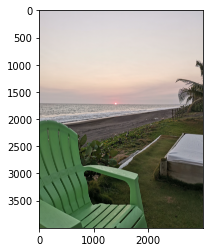

In [2]:
#Let' see an example
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread("/content/sunset.jpg")
plt.imshow(img)
print(np.shape(img))

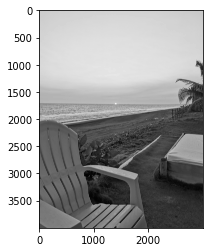

In [3]:
#let's convert to greyscale
#solution dot product of matrix with weight vector
# Use the weights we used before:
#                              Red: 0.299
#                            Green: 0.587
#                             Blue: 0.114
img_grey=np.dot(img[...,:3],[0.299,0.587,0.114])
plt.imshow(img_grey,cmap="gray")

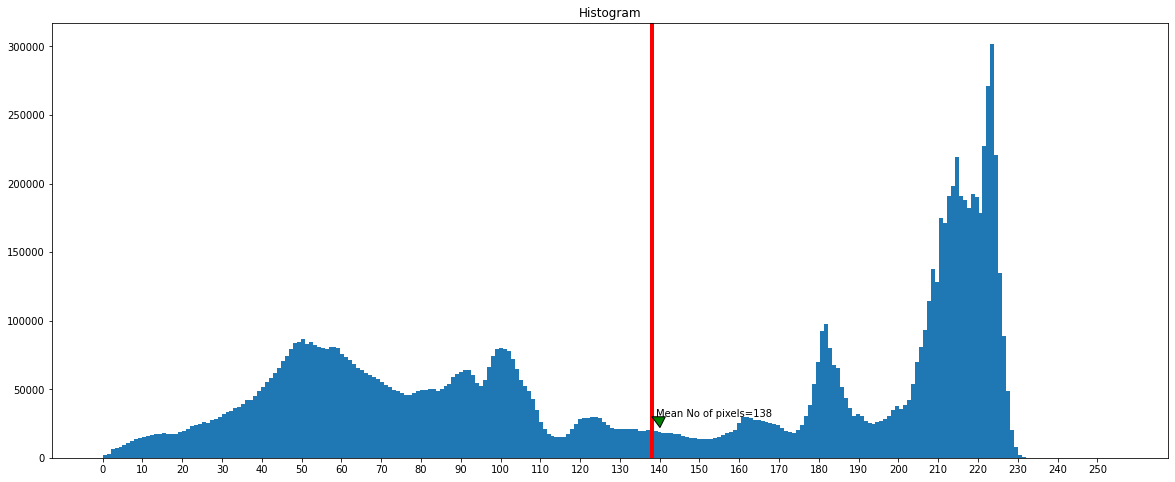

In [4]:
#histogram of grayscale image pixels distribution
plt.figure(figsize=(20,8))
plt.hist(img_grey.ravel(),256,[0,255]) #creates a flattened array and then plots
plt.axvline(x=np.nanmean(img_grey.ravel()),linewidth=4, color='r')
plt.annotate('Mean No of pixels=138', xy =(138, 30000),
                xytext =(139, 30000), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title('Histogram')
plt.xticks(np.arange(0, 255, 10))
plt.show()

In [6]:
img_grey.ravel()

array([196.25 , 197.25 , 197.25 , ...,  55.373,  57.145,  55.145])

In [7]:
#let's create a simple algorithm that illustrates this greyscale to BW conversion
"""
if pixel_val>threshold, assign white(255) else assign black(0)
"""
def grayscale_BW(img,threshold):
  rows,cols=np.shape(img)
  #zero matrix
  BW_img=np.zeros((rows,cols))
  for i in range(rows):
    for j in range(cols):
      BW_img[i,j]=0 if img[i,j]<=threshold else 255
  return BW_img


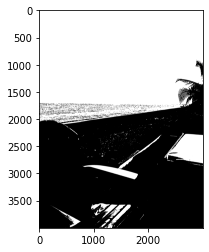

In [8]:
plt.imshow(grayscale_BW(img_grey,138),cmap='gray')

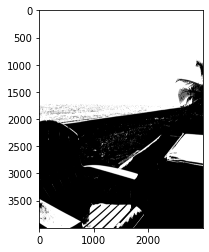

In [9]:
plt.imshow(grayscale_BW(img_grey,118),cmap='gray')

In [14]:
from matplotlib import rcParams

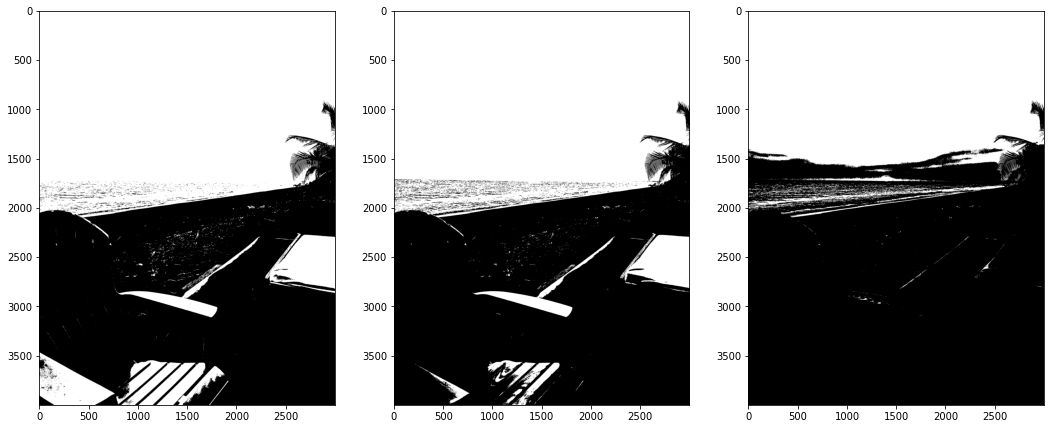

In [15]:
rcParams['figure.figsize'] = 18,8
fig,ax=plt.subplots(1,3)
ax[0].imshow(grayscale_BW(img_grey,118),cmap='gray')
ax[1].imshow(grayscale_BW(img_grey,138),cmap='gray')
ax[2].imshow(grayscale_BW(img_grey,185),cmap='gray')

In [ ]:
#lets use opencv for a faster execution and a different image
# threshold methods are used: 
#                     - Adaptive Mean Thresholding
#                     - Adaptive Gaussian Thresholding.